In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cartoon-dataset/Cartoon_datasets.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cartoon = pd.read_csv('/kaggle/input/cartoon-dataset/Cartoon_datasets.csv')

In [4]:
cartoon.head(10)

,Name,Span,Description,Rating
0,Batman: The Animated Series,(1992–1995),The Dark Knight battles crime in Gotham City w...,9.0
1,Samurai Jack,(2001–2017),"A samurai, sent through time, fights to return...",8.5
2,Avatar: The Last Airbender,(2005–2008),"In a war-torn world of elemental magic, a youn...",9.3
3,Total Drama Island,(2007–2014),Animated satire of survivor reality shows feat...,7.4
4,Scooby-Doo! Mystery Incorporated,(2010–2013),This incarnation finds Scooby and the gang liv...,8.1
5,Justice League,(2001–2004),Seven of the most formidable heroes form argua...,8.6
6,The Avengers: Earth's Mightiest Heroes,(2010–2012),"After 74 villains break out of prison, Marvel'...",8.3
7,Batman Beyond,(1999–2001),"Fuelled by remorse and vengeance, a high schoo...",8.1
8,Teenage Mutant Ninja Turtles,(2012–2017),"Four ninja turtles, mutated by a mysterious al...",7.9
9,Teen Titans,(2003–2006),A team of five teenaged superheroes save the w...,7.9


In [5]:
cartoon.tail(10)

,Name,Span,Description,Rating
90,Godzilla: The Series,(1998–2001),In this direct sequel to the 1998 Godzilla mov...,6.8
91,The Hollow,(2018–2020),Three teen strangers awaken in a dangerous wor...,7.2
92,Freakazoid!,(1995–1997),"Washington, D.C. has a new defender: Freakazoi...",7.5
93,Histeria!,(1998–2000),Edutainment animated series that parodies and ...,7.7
94,Duck Dodgers,(2003–2005),Animated science fiction series based on the a...,7.7
95,Viking Skool,(2022),A group of young students in training to becom...,6.4
96,The Looney Tunes Show,(2011–2015),An updated iteration of the classic Looney Tun...,7.7
97,The Fairly OddParents,(2001–2017),After being tortured and humiliated by his bab...,7.2
98,"The Adventures of Jimmy Neutron, Boy Genius",(2002–2006),"A young boy, who happens to be a genius, lives...",6.7
99,Daria,(1997–2002),A smart and cynical girl goes through teenage ...,8.1


In [6]:
cartoon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         100 non-null    object 
 1   Span         100 non-null    object 
 2   Description  100 non-null    object 
 3   Rating       100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [8]:
cartoon_clean = cartoon.isnull().sum()

In [9]:
cartoon_clean

Name           0
Span           0
Description    0
Rating         0
dtype: int64

In [18]:
cartoon.describe()

,Rating
count,100.000000
mean,7.873000
std,0.580466
min,6.400000
25%,7.500000
50%,7.850000
75%,8.300000
max,9.300000


In [19]:
cartoon.columns

Index(['Name', 'Span', 'Description', 'Rating'], dtype='object')

In [20]:
cartoon['Name'].value_counts()

Name
Batman: The Animated Series                1
Dexter's Laboratory                        1
Fillmore!                                  1
Tiny Toon Adventures                       1
The Bugs Bunny/Looney Tunes Comedy Hour    1
                                          ..
Castlevania                                1
3Below: Tales of Arcadia                   1
Tangled: The Series                        1
Futurama                                   1
Daria                                      1
Name: count, Length: 100, dtype: int64

In [21]:
cartoon['Span'].value_counts()

Span
(2008–2009)    2
(2003–2006)    2
(2012–2013)    2
(2023– )       2
(2021– )       2
              ..
(2004–2010)    1
(2005–2014)    1
(2011–2012)    1
(2018–2021)    1
(1997–2002)    1
Name: count, Length: 88, dtype: int64

In [22]:
cartoon['Description'].value_counts()

Description
The Dark Knight battles crime in Gotham City with occasional help from Robin and Batgirl.                                                                                                                                            1
The misadventures of a boy genius and his annoying sister.                                                                                                                                                                           1
Former delinquent now fights for the good guys at X Middle School.                                                                                                                                                                   1
The wacky adventures of the new young hip generation of Warner Brothers Looney Tunes characters, most of them descendants of the original classic toon cast.                                                                         1
A Saturday morning series, collecting of some of the most popula

In [23]:
cartoon['Rating'].value_counts()

Rating
8.1    9
7.2    9
8.3    8
7.5    8
7.7    8
7.8    7
7.4    5
7.9    5
8.4    5
8.0    4
8.7    4
8.2    4
7.3    3
7.6    3
8.5    3
7.0    2
9.0    2
8.6    2
8.8    1
6.8    1
6.4    1
6.9    1
8.9    1
6.6    1
9.1    1
9.3    1
6.7    1
Name: count, dtype: int64

Data Visualization

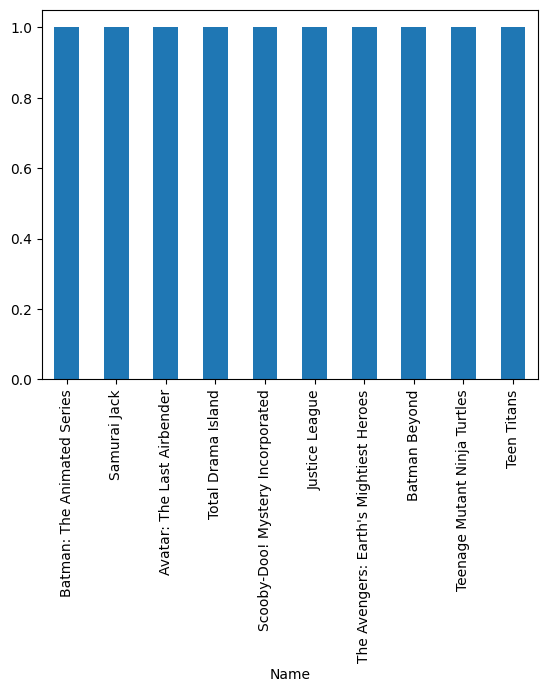

In [24]:
cartoon['Name'].head(10).value_counts().plot(kind='bar')
plt.show()

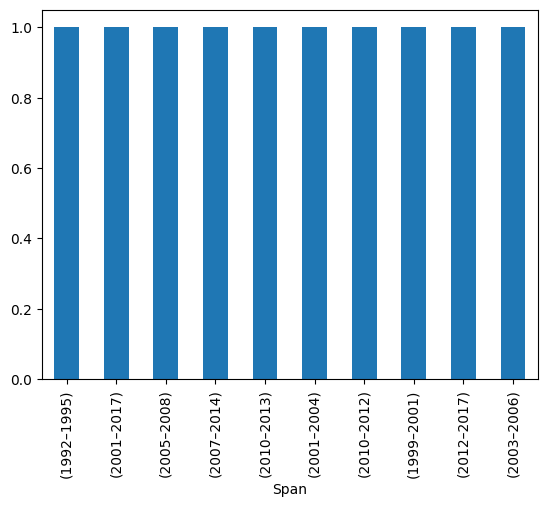

In [25]:
cartoon['Span'].head(10).value_counts().plot(kind='bar')
plt.show()

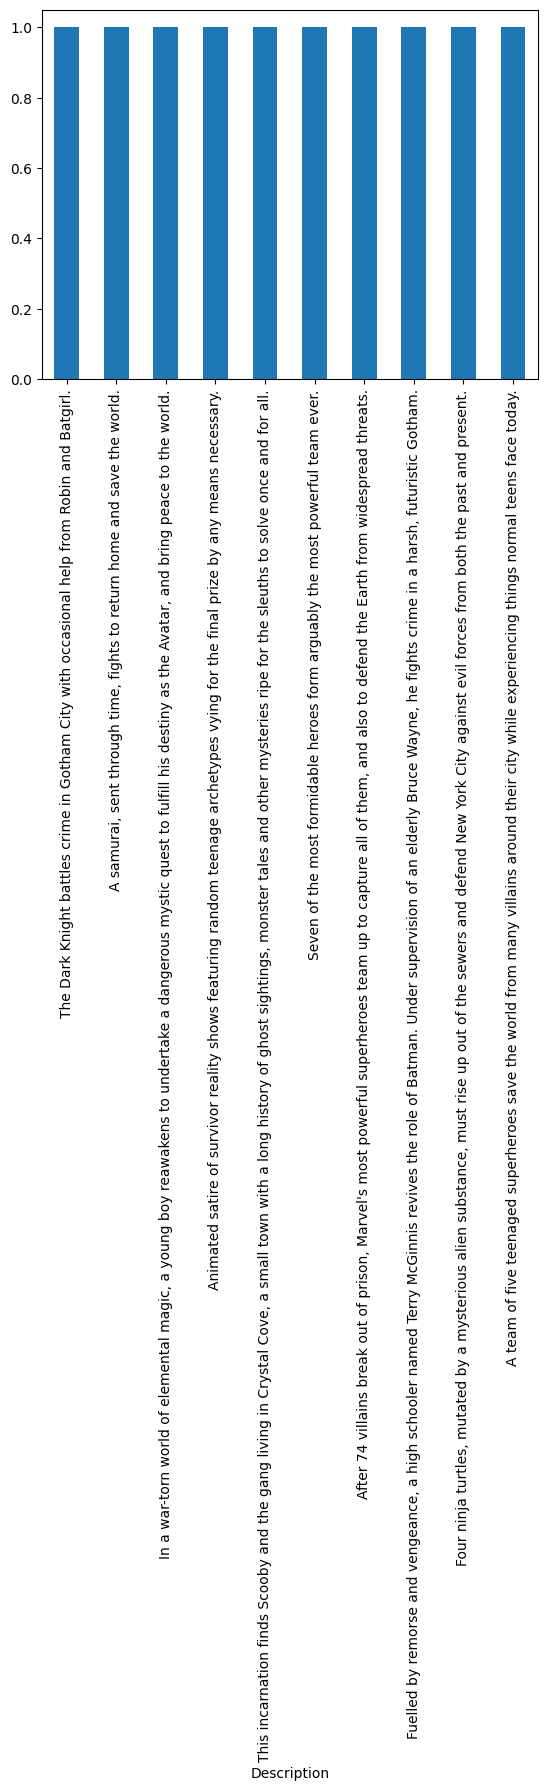

In [ ]:
cartoon['Description'].head(10).value_counts().plot(kind='bar')
plt.show()

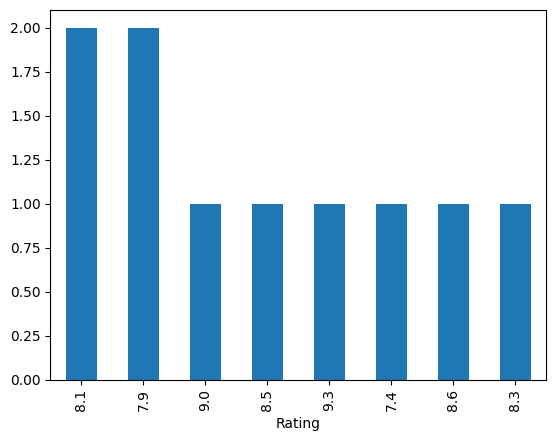

In [27]:
cartoon['Rating'].head(10).value_counts().plot(kind='bar')
plt.show()

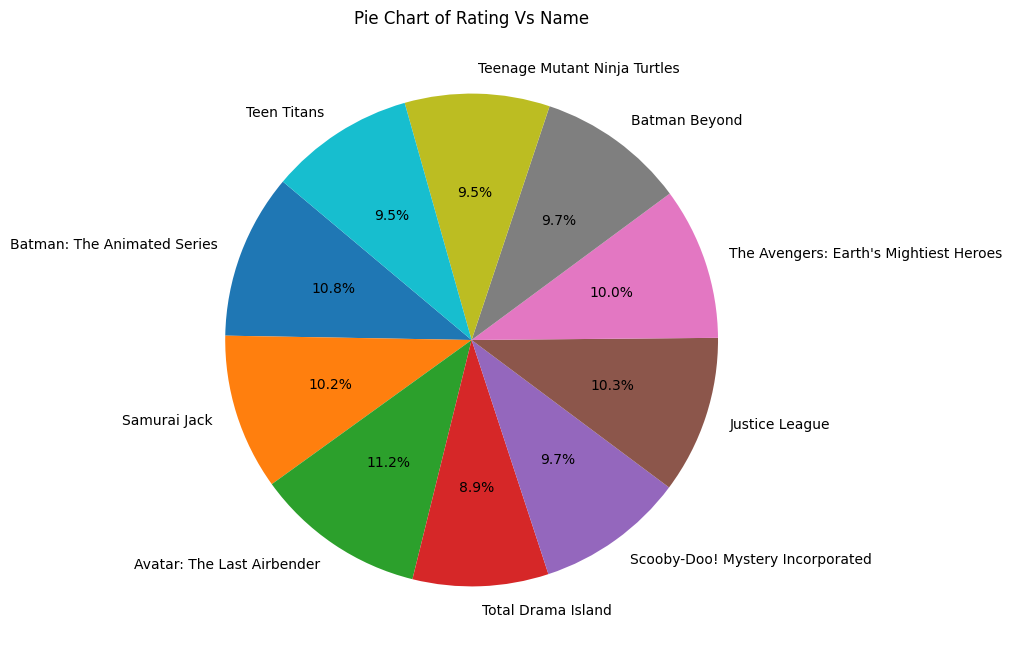

In [30]:
# piechart of sex vs cholesterol

# Select the first 10 rows
df_top10 = cartoon.head(10)

# Create a pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(df_top10['Rating'], labels=df_top10['Name'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Rating Vs Name')
plt.show()


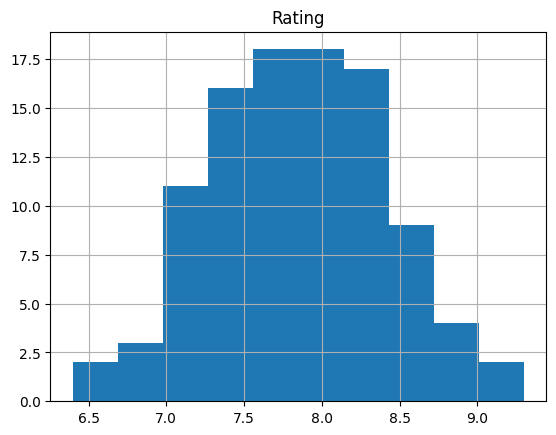

In [33]:
# histograms
cartoon.hist()
plt.show()

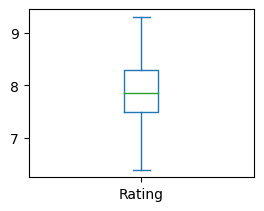

In [34]:
# box and whisker plots
cartoon.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()